<h1>App Physics 155 - LE 3</h1>
<h2>Kenneth V. Domingo<br />
2015-03116</h2>

<b>Problem 3.3: Oscillating chemical reactions</b>

The Belousov–Zhabotinsky reaction is a chemical oscillator, a cocktail of chemicals which, when heated, undergoes a series of reactions that cause the chemical concentrations in the mixture to oscillate between two extremes. You can add an indicator dye to the reaction which changes color depending on the concentrations and watch the mixture switch back and forth between two different colors for as long as you go on heating the mixture.

Physicist Ilya Prigogine formulated a mathematical model of this type of chemical oscillator, which he called the “Brusselator” after his home town of Brussels. The equations for the Brusselator are

\begin{equation}
    \frac{dx}{dt} = 1 - (b+1)x + ax^2 y
\end{equation}
\begin{equation}
    \frac{dy}{dt} = bx - ax^2 y
\end{equation}

Here $x$ and $y$ represent concentrations of chemicals and $a$ and $b$ are positive constants.

Write a program to solve these equations for the case $a$ = 1, $b$ = 3 with initial conditions $x$ = $y$ = 0, to an accuracy of at least $\delta$ = 10$^{−10}$ per unit time in both $x$ and $y$, using the adaptive Bulirsch–Stoer method. Calculate a solution from $t$ = 0 to $t$ = 20, initially using a single time interval of size $H$ = 20. Allow a maximum of $n$ = 8 modified midpoint steps in an interval before you divide in half and try again.

Make a plot of your solutions for $x$ and $y$ as a function of time, both on the same graph, and have your program add dots to the curves to show where the boundaries of the time intervals lie. You should find that the points are significantly closer together in parts of the solution where the variables are changing rapidly.

Hint: The simplest way to perform the calculation is to make use of recursion.

In [1]:
import numpy as np
import matplotlib.pyplot as mp
%matplotlib inline

In [2]:
a = 1
b = 3
delta = 1e-10
N = 1000
ta = 0.0
tb = 20.0
H = (tb-ta)/N

def f(r):
    x,y = r[0],r[1]
    fx = 1 - (b+1)*x + a*x**2*y
    fy = b*x - a*x**2*y
    return np.array([ fx , fy ], float)

In [3]:
tpoints = np.arange(ta,tb,H)
xpoints = []
ypoints = []
r = np.array([ 0.0 , 0.0 ], float)

for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[1])
    
    n = 1
    r1 = r + 0.5*H*f(r)
    r2 = r + H*f(r1)
    
    R1 = np.empty([1,2], float)
    R1[0] = 0.5*(r1 + r2 + 0.5*H*f(r2))
    
    err = 2*H*delta
    while err > H*delta:
        if n <= 8:
            n += 1
            h = H/n

            r1 = r + 0.5*h*f(r)
            r2 = r + h*f(r1)
            for i in range(n-1):
                r1 += h*f(r2)
                r2 += h*f(r1)

            R2 = np.copy(R1)
            R1 = np.empty([n,2], float)
            R1[0] = 0.5*(r1 + r2 + 0.5*h*f(r2))
            for m in range(1,n):
                epsilon = (R1[m-1] - R2[m-1])/((n/(n-1))**(2*m)-1)
                R1[m] = R1[m-1] + epsilon
            err = abs(epsilon[0])
        else:
            break
    r = R1[n-1]

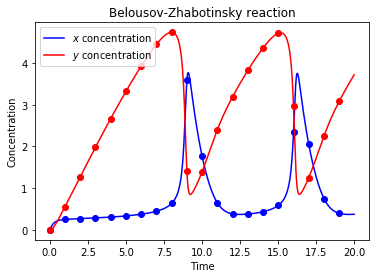

In [4]:
mp.plot(tpoints, xpoints, "b-", label="$x$ concentration")
mp.plot(tpoints[::50], xpoints[::50], "bo")
mp.plot(tpoints, ypoints, "r-", label="$y$ concentration")
mp.plot(tpoints[::50], ypoints[::50], "ro")
mp.xlabel("Time")
mp.ylabel("Concentration")
mp.title("Belousov-Zhabotinsky reaction")
mp.legend()
mp.show()